## Linear Regression and Learning Curve challenges

### Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)

logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)



In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics


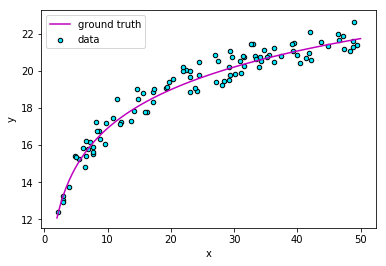

In [68]:
np.random.seed(0)

def f(x):
    return 10+3*np.log(x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(2, 50, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(x_plot.min(), x_plot.max(), size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.5, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='m')
ax.scatter(X, y, label='data', s=20, facecolors=(0,0.9,1),edgecolors=(0,0,0))
# ax.set_ylim((0, 2))
# ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [69]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
#     ax.set_ylim((-2, 2))
#     ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right',frameon=True)

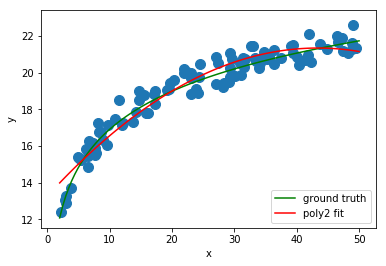

In [46]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='poly%d fit' % degree)

In [34]:
est.score(X,y)

0.93138444487884819

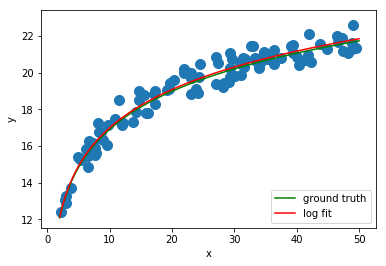

In [71]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log)
est = make_pipeline(transformer, LinearRegression())
est.fit(X, y)
# Plot the results
fig,ax = plt.subplots(1,1)
plot_approximation(est, ax, label='log fit')

In [72]:
est.score(X,y)

0.9560289756534559

### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

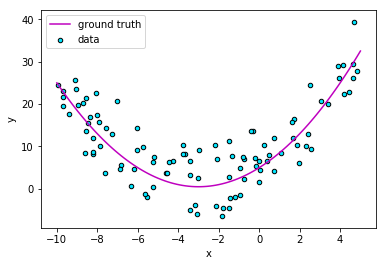

In [53]:
np.random.seed(0)

def f(x):
    return 5+3*x+0.5*x**2

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(-10, 5, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(x_plot.min(), x_plot.max(), size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=5, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='m')
ax.scatter(X, y, label='data', s=20, facecolors=(0,0.9,1),edgecolors=(0,0,0))
# ax.set_ylim((0, 2))
# ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

In [73]:
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4444,test_size=0.3)
# Fit the model against the training data
est.fit(X_train, y_train)
# Evaluate the model against the testing data
est.score(X_test, y_test)

0.94996339985898381

In [66]:
print('training error (MSE)', metrics.mean_squared_error(lr.predict(X_train),y_train))
print('test error (MSE):', metrics.mean_squared_error(lr.predict(X_test),y_test))
print('trainning R2:', lr.score(X_train,y_train))
print('test R2:', lr.score(X_test,y_test))

training error (MSE) 86.9704301833
test error (MSE): 84.5195024624
trainning R2: 0.0121261284403
test R2: 0.00322024727191


### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error  
test error  
R squared  
AIC  

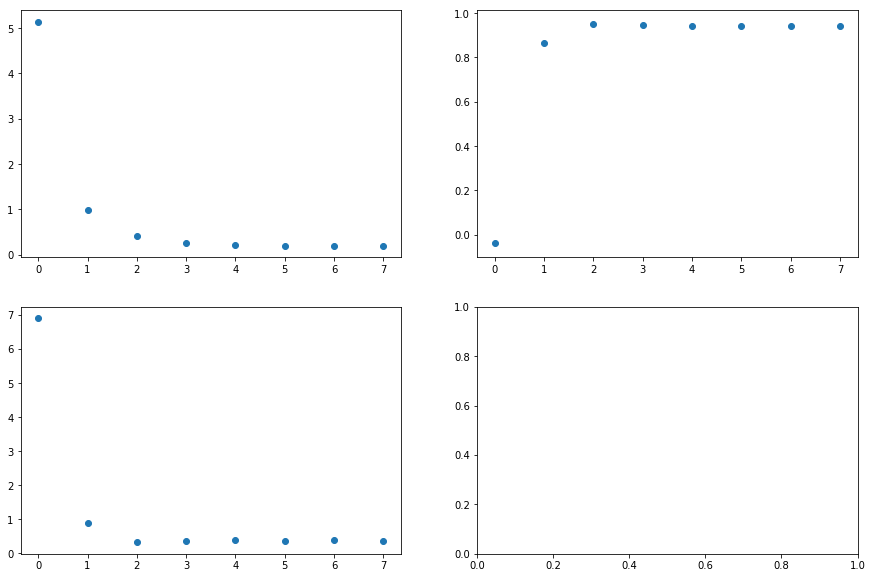

In [77]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
degrees = []
train_err=[]
test_err=[]
R2 = []
AIC = []
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    degrees.append(degree)
    train_err.append(metrics.mean_squared_error(est.predict(X_train),y_train))
    test_err.append(metrics.mean_squared_error(est.predict(X_test),y_test))
    R2.append(est.score(X_test,y_test))
ax[0,0].scatter(degrees,train_err)
ax[1,0].scatter(degrees,test_err)
ax[0,1].scatter(degrees,R2)

### Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

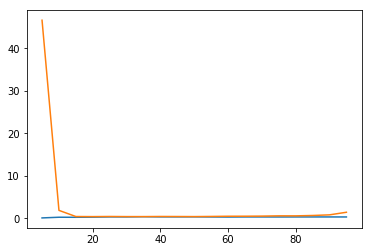

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))
ms = []
train_err=[]
test_err=[]
R2 = []
AIC = []
degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
for m in np.arange(5,100,5):
    X_train = X[:m]
    y_train = y[:m]
    X_test = X[m:]
    y_test = y[m:]
    est.fit(X_train, y_train)
    ms.append(m)
    train_err.append(metrics.mean_squared_error(est.predict(X_train),y_train))
    test_err.append(metrics.mean_squared_error(est.predict(X_test),y_test))
    R2.append(est.score(X_test,y_test))
ax.plot(ms,train_err)
ax.plot(ms,test_err)